<a href="https://colab.research.google.com/github/murillofnc22/labs-bairesdev-ml-training/blob/main/MetricasAvaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd

In [2]:
%load_ext tensorboard

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8885 - loss: 0.3479 - val_accuracy: 0.9875 - val_loss: 0.0390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0483 - val_accuracy: 0.9861 - val_loss: 0.0386
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9905 - val_loss: 0.0290
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9922 - val_loss: 0.0282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9890 - val_loss: 0.0357


In [9]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


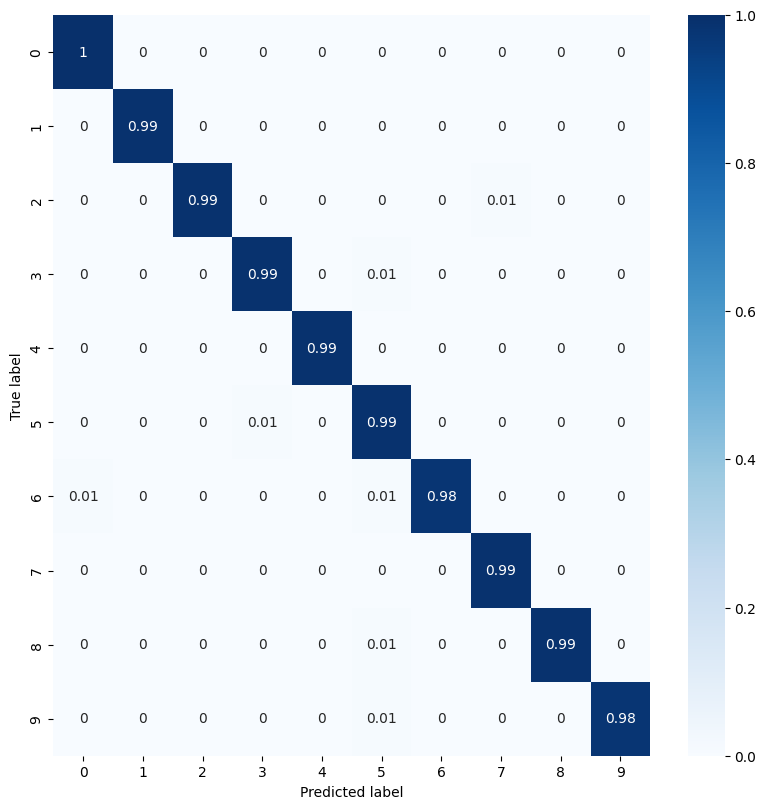

In [10]:
classes=[0,1,2,3,4,5,6,7,8,9]

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Calculando

In [11]:
# Accuracy
accuracy = np.trace(con_mat) / np.sum(con_mat)

# Calculando TP, FP, FN e TN
TP = np.diag(con_mat)
FP = np.sum(con_mat, axis=0) - TP
FN = np.sum(con_mat, axis=1) - TP
TN = np.sum(con_mat) - (FP + FN + TP)

# Previnindo division by zero
precision = np.divide(TP, (TP + FP), out=np.zeros_like(TP, dtype=float), where=(TP+FP)!=0)
recall    = np.divide(TP, (TP + FN), out=np.zeros_like(TP, dtype=float), where=(TP+FN)!=0)  # Sensitivity
specificity = np.divide(TN, (TN + FP), out=np.zeros_like(TN, dtype=float), where=(TN+FP)!=0)
f1_score  = np.divide(2 * precision * recall, (precision + recall),
                      out=np.zeros_like(precision, dtype=float), where=(precision+recall)!=0)

# Macro averages (average over classes)
macro_precision   = np.mean(precision)
macro_recall      = np.mean(recall)
macro_specificity = np.mean(specificity)
macro_f1          = np.mean(f1_score)

print(f"Accuracy:       {accuracy:.4f}")
print(f"Macro Precision:{macro_precision:.4f}")
print(f"Macro Recall:   {macro_recall:.4f}")
print(f"Macro Specificity: {macro_specificity:.4f}")
print(f"Macro F1-score: {macro_f1:.4f}")

Accuracy:       0.9890
Macro Precision:0.9888
Macro Recall:   0.9889
Macro Specificity: 0.9988
Macro F1-score: 0.9888
